# Descripción

La compañía de seguros Sure Tomorrow quiere resolver varias tareas con la ayuda de machine learning y te pide que evalúes esa posibilidad.

- Tarea 1: encontrar clientes que sean similares a un cliente determinado. Esto ayudará a los agentes de la compañía con el marketing.
- Tarea 2: predecir la probabilidad de que un nuevo cliente reciba una prestación del seguro. ¿Puede un modelo de predictivo funcionar mejor que un modelo dummy?
- Tarea 3: predecir el número de prestaciones de seguro que un nuevo cliente pueda recibir utilizando un modelo de regresión lineal.
- Tarea 4: proteger los datos personales de los clientes sin afectar al modelo del ejercicio anterior. Es necesario desarrollar un algoritmo de transformación de datos que dificulte la recuperación de la información personal si los datos caen en manos equivocadas. Esto se denomina enmascaramiento u ofuscación de datos. Pero los datos deben protegerse de tal manera que no se vea afectada la calidad de los modelos de machine learning. No es necesario elegir el mejor modelo, basta con demostrar que el algoritmo funciona correctamente.


# Preprocesamiento y exploración de datos

## Inicialización

In [105]:
import numpy as np
import pandas as pd
import math 

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.linear_model
import sklearn.neighbors
import sklearn.preprocessing
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression

## Carga de datos

Carga los datos y haz una revisión básica para comprobar que no hay problemas obvios.

In [106]:
df = pd.read_csv('insurance_us.csv')

Renombramos las columnas para que el código se vea más coherente con su estilo.

In [107]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [108]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
2883,1,49.0,41700.0,0,2
2677,1,22.0,31000.0,1,0
1143,1,50.0,58200.0,0,2
769,1,39.0,39900.0,1,0
1881,0,26.0,45600.0,0,0
2982,0,29.0,46800.0,2,0
1165,0,33.0,37200.0,0,0
2392,1,25.0,43500.0,2,0
584,1,43.0,42300.0,0,1
4587,1,39.0,34500.0,1,0


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [110]:
# puede que queramos cambiar el tipo de edad (de float a int) aunque esto no es crucial

# escribe tu conversión aquí si lo deseas:
df['age'] = df['age'].astype('int')


In [111]:
# comprueba que la conversión se haya realizado con éxito
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


# ahora echa un vistazo a las estadísticas descriptivas de los datos.
# ¿Se ve todo bien?

In [112]:
df.isna().sum()

gender                0
age                   0
income                0
family_members        0
insurance_benefits    0
dtype: int64

In [113]:
df.nunique()

gender                  2
age                    46
income                524
family_members          7
insurance_benefits      6
dtype: int64

In [114]:
df.duplicated().sum()

np.int64(153)

In [115]:
df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [116]:
df.drop_duplicates(inplace=True)

In [117]:
df=df.reset_index(drop=True)
df

,gender,age,income,family_members,insurance_benefits
0,1,41,49600.0,1,0
1,0,46,38000.0,1,1
2,0,29,21000.0,0,0
3,0,21,41700.0,2,0
4,1,28,26100.0,0,0
...,...,...,...,...,...
4842,0,28,35700.0,2,0
4843,0,34,52400.0,1,0
4844,0,20,33900.0,2,0
4845,1,22,32700.0,3,0


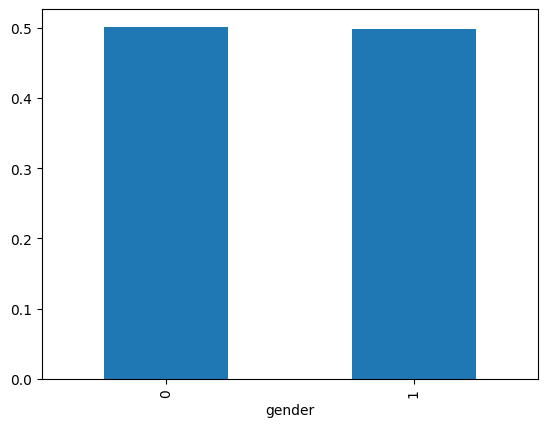

In [118]:
df['gender'].value_counts(normalize=True).plot(kind="bar")
plt.show()

In [119]:
df

,gender,age,income,family_members,insurance_benefits
0,1,41,49600.0,1,0
1,0,46,38000.0,1,1
2,0,29,21000.0,0,0
3,0,21,41700.0,2,0
4,1,28,26100.0,0,0
...,...,...,...,...,...
4842,0,28,35700.0,2,0
4843,0,34,52400.0,1,0
4844,0,20,33900.0,2,0
4845,1,22,32700.0,3,0


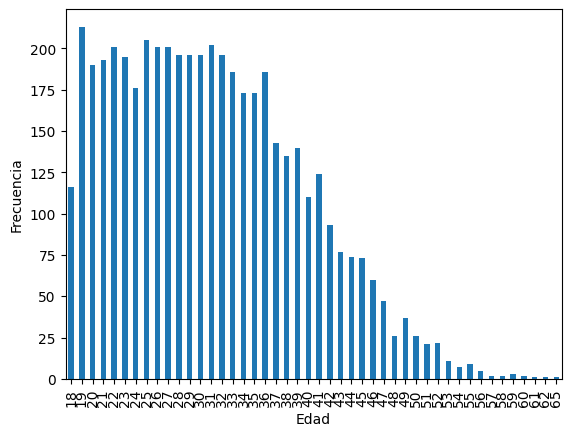

In [120]:
df['age'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

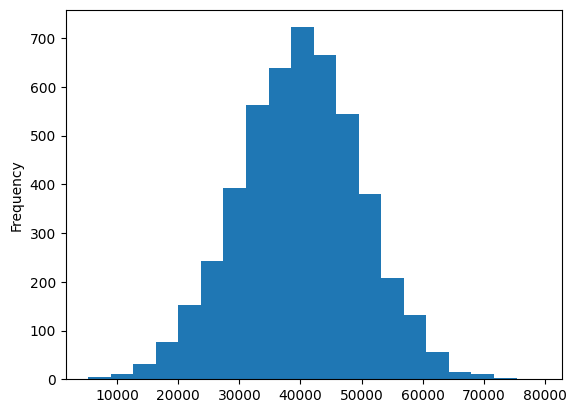

In [121]:
df['income'].plot(kind="hist", x='income', bins=20)
plt.show()

<Axes: xlabel='family_members'>

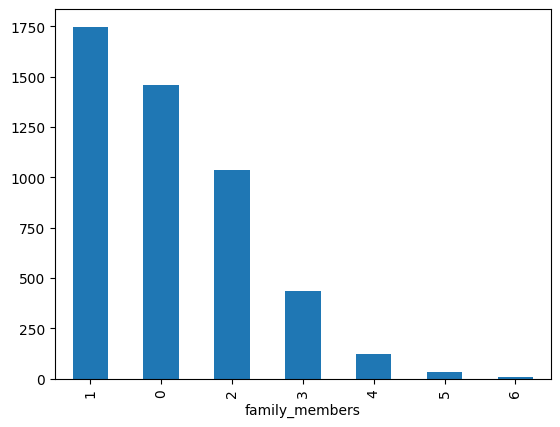

In [122]:
df['family_members'].value_counts().sort_values(ascending=False).plot(kind='bar')

## Análisis exploratorio de datos

Vamos a comprobar rápidamente si existen determinados grupos de clientes observando el gráfico de pares.

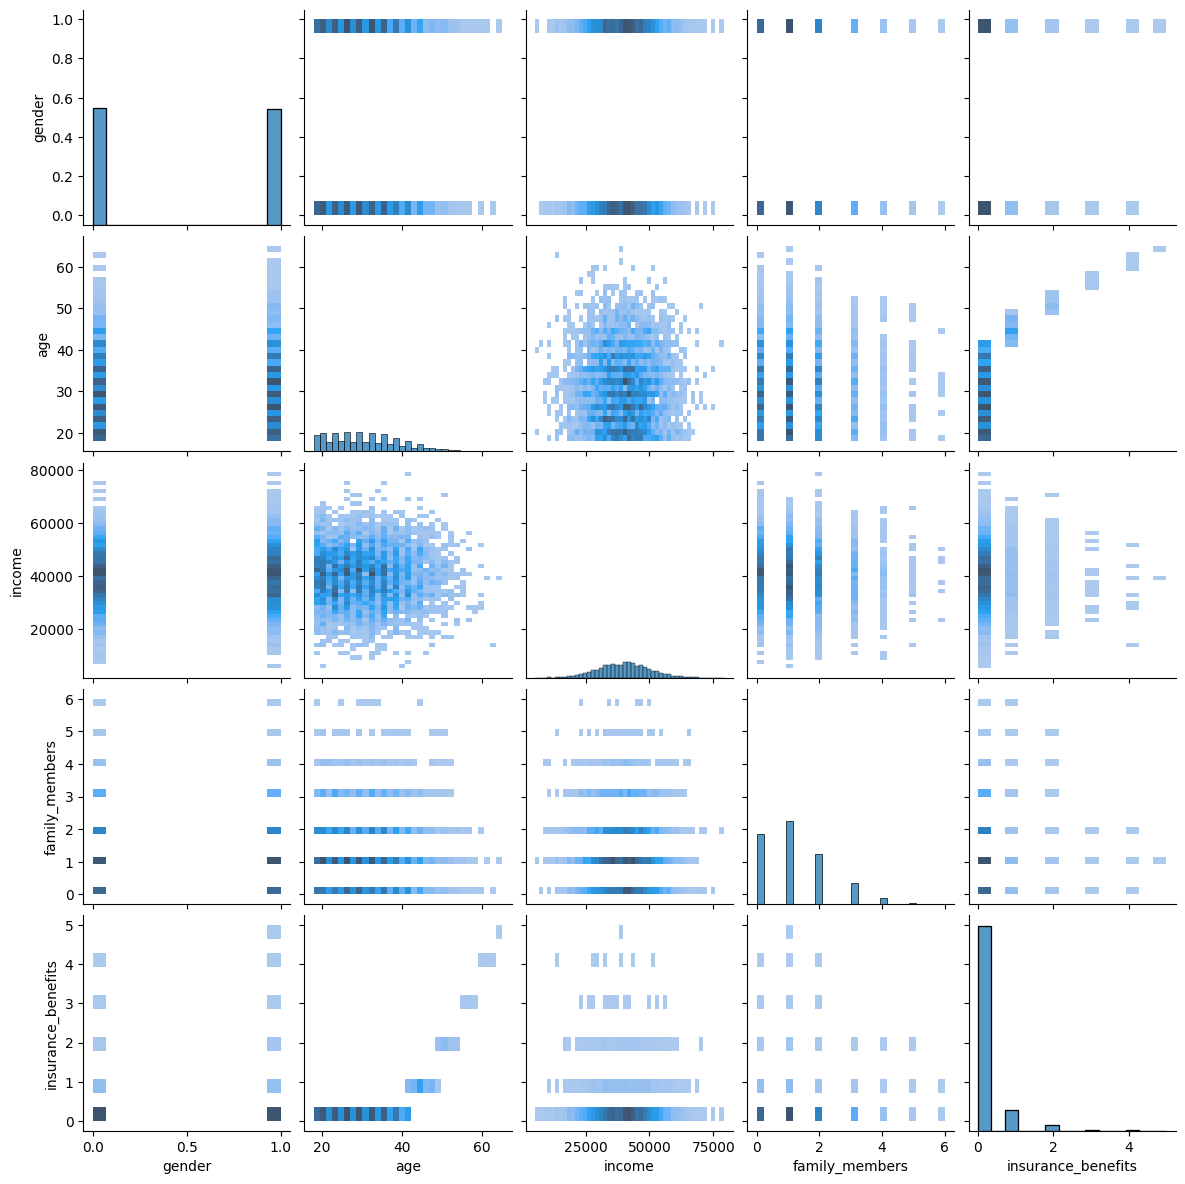

In [123]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

De acuerdo, es un poco complicado detectar grupos obvios (clústeres) ya que es difícil combinar diversas variables simultáneamente (para analizar distribuciones multivariadas). Ahí es donde LA y ML pueden ser bastante útiles.

# Tarea 1. Clientes similares

En el lenguaje de ML, es necesario desarrollar un procedimiento que devuelva los k vecinos más cercanos (objetos) para un objeto dado basándose en la distancia entre los objetos.

Es posible que quieras revisar las siguientes lecciones (capítulo -> lección)
- Distancia entre vectores -> Distancia euclidiana
- Distancia entre vectores -> Distancia Manhattan

Para resolver la tarea, podemos probar diferentes métricas de distancia.

Escribe una función que devuelva los k vecinos más cercanos para un $n^{th}$ objeto basándose en una métrica de distancia especificada. A la hora de realizar esta tarea no debe tenerse en cuenta el número de prestaciones de seguro recibidas.

Puedes utilizar una implementación ya existente del algoritmo kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) o tu propia implementación.

Pruébalo para cuatro combinaciones de dos casos
- Escalado
  - los datos no están escalados
  - los datos se escalan con el escalador [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)
- Métricas de distancia
  - Euclidiana
  - Manhattan

Responde a estas preguntas:
- ¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?
- ¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?

In [124]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [125]:
def get_knn(df, n, k, metric):
    
    """
    Devuelve los k vecinos más cercanos

    :param df: DataFrame de pandas utilizado para encontrar objetos similares dentro del mismo lugar
    :param n: número de objetos para los que se buscan los vecinos más cercanos
    :param k: número de vecinos más cercanos a devolver
    :param métrica: nombre de la métrica de distancia
    """
    if metric=='euclidean':
        p= 2
    elif metric=='manhattan':
        p= 1

    nbrs = NearestNeighbors(n_neighbors=n,metric=metric,p=2) 
    nbrs.fit(df[feature_names])
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)

    return df_res

In [126]:
df

,gender,age,income,family_members,insurance_benefits
0,1,41,49600.0,1,0
1,0,46,38000.0,1,1
2,0,29,21000.0,0,0
3,0,21,41700.0,2,0
4,1,28,26100.0,0,0
...,...,...,...,...,...
4842,0,28,35700.0,2,0
4843,0,34,52400.0,1,0
4844,0,20,33900.0,2,0
4845,1,22,32700.0,3,0


Escalar datos.

In [127]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

C:\Users\gerar\AppData\Local\Temp\ipykernel_14208\760832288.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.63076923 0.70769231 0.44615385 ... 0.30769231 0.33846154 0.43076923]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())
C:\Users\gerar\AppData\Local\Temp\ipykernel_14208\760832288.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.16666667 0.16666667 0.         ... 0.33333333 0.5        0.16666667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())


In [128]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
364,1,0.615385,0.427848,0.000000,0
1323,0,0.338462,0.534177,0.333333,0
3286,1,0.430769,0.548101,0.500000,0
4786,1,0.615385,0.305063,0.333333,0
3981,0,0.507692,0.410127,0.000000,0


Ahora, vamos a obtener registros similares para uno determinado, para cada combinación

In [129]:
get_knn(df, 4, 5,'euclidean')

c:\Users\gerar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,gender,age,income,family_members,insurance_benefits,distance
4,1,28,26100.0,0,0,0.000000
2643,1,31,26100.0,3,0,4.242641
2714,1,24,26100.0,2,0,4.472136
3259,0,34,26100.0,0,0,6.082763
4577,1,22,26100.0,2,0,6.324555


In [130]:
get_knn(df, 4, 5,'manhattan')

c:\Users\gerar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,gender,age,income,family_members,insurance_benefits,distance
4,1,28,26100.0,0,0,0.0
2714,1,24,26100.0,2,0,6.0
2643,1,31,26100.0,3,0,6.0
3259,0,34,26100.0,0,0,7.0
4577,1,22,26100.0,2,0,8.0


In [131]:
get_knn(df_scaled, 4, 5,'euclidean')

c:\Users\gerar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,gender,age,income,family_members,insurance_benefits,distance
4,1,0.430769,0.330380,0.0,0,0.000000
348,1,0.430769,0.322785,0.0,0,0.007595
3823,1,0.430769,0.321519,0.0,0,0.008861
3569,1,0.430769,0.317722,0.0,0,0.012658
1420,1,0.446154,0.331646,0.0,0,0.015437


In [132]:
get_knn(df_scaled, 4, 5,'manhattan')

c:\Users\gerar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,gender,age,income,family_members,insurance_benefits,distance
4,1,0.430769,0.330380,0.0,0,0.000000
348,1,0.430769,0.322785,0.0,0,0.007595
3823,1,0.430769,0.321519,0.0,0,0.008861
3569,1,0.430769,0.317722,0.0,0,0.012658
1420,1,0.446154,0.331646,0.0,0,0.016650


Respuestas a las preguntas

**¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?** 

Si se puede observar que cuando los datos están escalados las distancias coinciden exactamente para ambos tipos de distancias 

**¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?** 

Muy diferente ya que la distancia Manhattan no tiene puntos decimales como la distancia euclidiana, debido a la forma de la distancia Manhattan 

# Tarea 2. ¿Es probable que el cliente reciba una prestación del seguro?

En términos de machine learning podemos considerarlo como una tarea de clasificación binaria.

Con el valor de `insurance_benefits` superior a cero como objetivo, evalúa si el enfoque de clasificación kNN puede funcionar mejor que el modelo dummy.

Instrucciones:
- Construye un clasificador basado en KNN y mide su calidad con la métrica F1 para k=1...10 tanto para los datos originales como para los escalados. Sería interesante observar cómo k puede influir en la métrica de evaluación y si el escalado de los datos provoca alguna diferencia. Puedes utilizar una implementación ya existente del algoritmo de clasificación kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) o tu propia implementación.
- Construye un modelo dummy que, en este caso, es simplemente un modelo aleatorio. Debería devolver "1" con cierta probabilidad. Probemos el modelo con cuatro valores de probabilidad: 0, la probabilidad de pagar cualquier prestación del seguro, 0.5, 1.

La probabilidad de pagar cualquier prestación del seguro puede definirse como

$$
P\{\text{prestación de seguro recibida}\}=\frac{\text{número de clientes que han recibido alguna prestación de seguro}}{\text{número total de clientes}}.
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30.

In [133]:
# сalcula el objetivo

df['insurance_benefits_received'] = (df['insurance_benefits'] > 0).astype(int)

In [134]:
df['insurance_benefits_received']

0       0
1       1
2       0
3       0
4       0
       ..
4842    0
4843    0
4844    0
4845    0
4846    0
Name: insurance_benefits_received, Length: 4847, dtype: int64

<Axes: xlabel='insurance_benefits_received'>

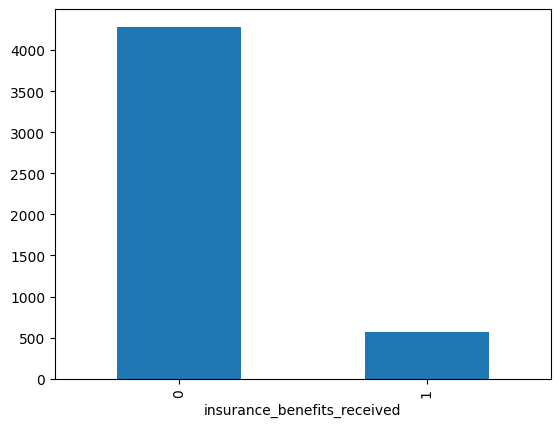

In [135]:
# comprueba el desequilibrio de clases con value_counts()
df['insurance_benefits_received'].value_counts().plot(kind='bar')
# <tu código aquí>

In [136]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# si tienes algún problema con la siguiente línea, reinicia el kernel y ejecuta el cuaderno de nuevo
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriz de confusión')
    print(cm)

In [137]:
# generar la salida de un modelo aleatorio

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [138]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'La probabilidad: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P=P, size=len(df))
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)

    print()

La probabilidad: 0.00
F1: 0.00
Matriz de confusión
[[0.88384568 0.        ]
 [0.11615432 0.        ]]

La probabilidad: 0.12
F1: 0.13
Matriz de confusión
[[0.78502166 0.09882401]
 [0.1017124  0.01444192]]

La probabilidad: 0.50
F1: 0.19
Matriz de confusión
[[0.44873117 0.4351145 ]
 [0.05921188 0.05694244]]

La probabilidad: 1.00
F1: 0.21
Matriz de confusión
[[0.         0.88384568]
 [0.         0.11615432]]



In [139]:
scaler = StandardScaler()

In [140]:
features= df.drop(['insurance_benefits_received', 'insurance_benefits'], axis=1)
target= df['insurance_benefits_received']

In [141]:
features_train, features_test, target_train, target_test= train_test_split(features, target, test_size=0.30)

In [142]:
target_train

1970    0
1030    0
3426    0
3179    0
1421    0
       ..
108     0
3137    0
3625    0
138     0
4555    0
Name: insurance_benefits_received, Length: 3392, dtype: int64

In [143]:
for i in range (1,11):
    model=KNeighborsClassifier(n_neighbors=i, weights='distance')
    model.fit(features_train, target_train)
    predictions=model.predict(features_test)
    f1 = f1_score(target_test, predictions)
    print(i, f1)

1 0.6789667896678967
2 0.6792452830188679
3 0.6356589147286822
4 0.5934959349593496
5 0.5361702127659574
6 0.49557522123893805
7 0.4636363636363636
8 0.4444444444444444
9 0.4131455399061033
10 0.41509433962264153


In [144]:

x_train_scaled=scaler.fit_transform(features_train)
x_test_scaled=scaler.fit_transform(features_test)

for i in range (1,11):
    model=KNeighborsClassifier(n_neighbors=i, weights='distance')
    model.fit(x_train_scaled, target_train)
    predictions=model.predict(x_test_scaled)
    f1 = f1_score(target_test, predictions)
    print(i, f1)

1 0.9226006191950464
2 0.9226006191950464
3 0.910828025477707
4 0.926984126984127
5 0.9235668789808917
6 0.9308176100628931
7 0.9294871794871795
8 0.9294871794871795
9 0.9260450160771704
10 0.9290322580645162


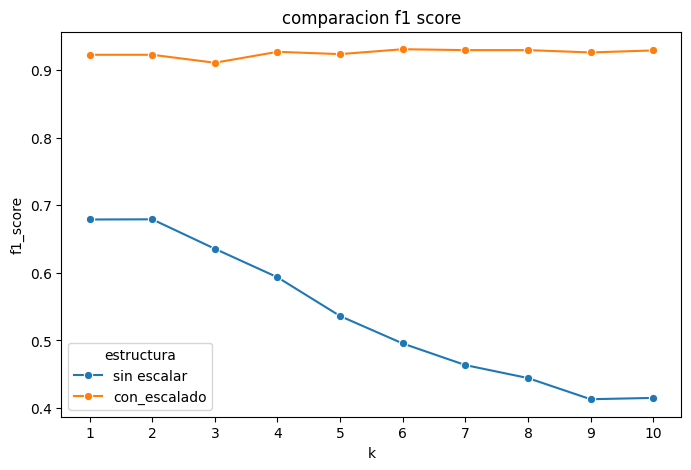

In [145]:
f1_sin_escalar=[]
f1_escalado =[]

for i in range(1,11):
    model=KNeighborsClassifier(n_neighbors=i, weights='distance')
    model.fit(features_train, target_train)
    predictions=model.predict(features_test)
    f1_sin_escalar.append(f1_score(target_test, predictions))
    # escalados
    model.fit(x_train_scaled, target_train)
    predictions=model.predict(x_test_scaled)
    f1_escalado.append(f1_score(target_test, predictions))

results=pd.DataFrame({
    "k":list(range(1,11))+list(range(1,11)), 
    "f1_score":f1_sin_escalar+f1_escalado,
    "estructura":["sin escalar"]*10+["con_escalado"]*10
})
#grafico 
plt.figure(figsize=(8,5))
sns.lineplot(data=results, x="k", y="f1_score", hue="estructura", marker="o")
plt.title("comparacion f1 score")
plt.xticks(range(1,11))
plt.show()

los datos sin escalar `(linea azul)` comienzan con un `f1` score de `0.66`, a medida que aumenta el `k` ese valor comienza a disminuir drasticamente llegando a valores cercanos de 0.44 monstrando que sin escalado pierde calidad. 
En contraste con los valores escalados `(linea naranja)` se mantiene un equilibrio a lo largo del valor `k`.

# Tarea 3. Regresión (con regresión lineal)

Con `insurance_benefits` como objetivo, evalúa cuál sería la RECM de un modelo de regresión lineal.

Construye tu propia implementación de regresión lineal. Para ello, recuerda cómo está formulada la solución de la tarea de regresión lineal en términos de LA. Comprueba la RECM tanto para los datos originales como para los escalados. ¿Puedes ver alguna diferencia en la RECM con respecto a estos dos casos?

Denotemos
- $X$: matriz de características; cada fila es un caso, cada columna es una característica, la primera columna está formada por unidades
- $y$ — objetivo (un vector)
- $\hat{y}$ — objetivo estimado (un vector)
- $w$ — vector de pesos

La tarea de regresión lineal en el lenguaje de las matrices puede formularse así:

$$
y = Xw
$$

El objetivo de entrenamiento es entonces encontrar esa $w$ w que minimice la distancia L2 (ECM) entre $Xw$ y $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

Parece que hay una solución analítica para lo anteriormente expuesto:

$$
w = (X^T X)^{-1} X^T y
$$

La fórmula anterior puede servir para encontrar los pesos $w$ y estos últimos pueden utilizarse para calcular los valores predichos

$$
\hat{y} = X_{val}w
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30. Utiliza la métrica RECM para evaluar el modelo.

In [146]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # añadir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T@X2)@X2.T@y

    def predict(self, X):
        
        # añadir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        y_pred = X2@self.weights
        
        return y_pred

In [147]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [148]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.77366729e-01  3.58042291e-02  1.95594888e-02  5.85336165e-07
 -1.21618420e-02]
RMSE: 0.36
R2: 0.66


# Tarea 4. Ofuscar datos

Lo mejor es ofuscar los datos multiplicando las características numéricas (recuerda que se pueden ver como la matriz $X$) por una matriz invertible $P$. 

$$
X' = X \times P
$$

Trata de hacerlo y comprueba cómo quedarán los valores de las características después de la transformación. Por cierto, la propiedad de invertibilidad es importante aquí, así que asegúrate de que $P$ sea realmente invertible.

Puedes revisar la lección 'Matrices y operaciones matriciales -> Multiplicación de matrices' para recordar la regla de multiplicación de matrices y su implementación con NumPy.

In [149]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [150]:
X = df_pn.to_numpy()
X

array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       ...,
       [0.00e+00, 2.00e+01, 3.39e+04, 2.00e+00],
       [1.00e+00, 2.20e+01, 3.27e+04, 3.00e+00],
       [1.00e+00, 2.80e+01, 4.06e+04, 1.00e+00]], shape=(4847, 4))

Generar una matriz aleatoria $P$.

In [151]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

In [152]:
P_inversa=np.linalg.inv(P)

In [153]:
P

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499],
       [0.64386512, 0.82276161, 0.4434142 , 0.22723872]])

In [154]:
P_inversa

array([[ 0.41467992, -1.43783972,  0.62798546,  1.14001268],
       [-1.06101789,  0.44219337,  0.1329549 ,  1.18425933],
       [ 1.42362442,  1.60461607, -2.0553823 , -1.53699695],
       [-0.11128575, -0.65813802,  1.74995517, -0.11816316]])

Comprobar que la matriz P sea invertible

In [155]:
X_prime =X@P 
X_prime

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       ...,
       [ 4346.2234249 , 15289.24126492, 12586.16264392, 31433.50888552],
       [ 4194.09324155, 14751.9910242 , 12144.02930637, 30323.88763426],
       [ 5205.46827354, 18314.24814446, 15077.01370762, 37649.59295455]],
      shape=(4847, 4))

¿Puedes adivinar la edad o los ingresos de los clientes después de la transformación?

No se pueden ya que estan invertidos por lo tanto no es posible leerlos 

¿Puedes recuperar los datos originales de $X'$ si conoces $P$? Intenta comprobarlo a través de los cálculos moviendo $P$ del lado derecho de la fórmula anterior al izquierdo. En este caso las reglas de la multiplicación matricial son realmente útiles

In [156]:
x_transform= pd.DataFrame(X_prime, columns=personal_info_column_list)
x_transform.head()

,gender,age,income,family_members
0,6359.715273,22380.404676,18424.090742,46000.696690
1,4873.294065,17160.367030,14125.780761,35253.455773
2,2693.117429,9486.397744,7808.831560,19484.860631
3,5345.603937,18803.227203,15479.148373,38663.061863
4,3347.176735,11782.829283,9699.998942,24211.273378


In [157]:
x_transform.isna().sum()

gender            0
age               0
income            0
family_members    0
dtype: int64

In [158]:
x_reversed= pd.DataFrame(x_transform.to_numpy() @ P_inversa, columns=personal_info_column_list)
x_reversed

,gender,age,income,family_members
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,-4.473636e-12,46.0,38000.0,1.000000e+00
2,-2.515869e-12,29.0,21000.0,9.524523e-13
3,-4.844982e-12,21.0,41700.0,2.000000e+00
4,1.000000e+00,28.0,26100.0,-1.019907e-13
...,...,...,...,...
4842,-2.559766e-12,28.0,35700.0,2.000000e+00
4843,-5.486091e-12,34.0,52400.0,1.000000e+00
4844,-1.928379e-12,20.0,33900.0,2.000000e+00
4845,1.000000e+00,22.0,32700.0,3.000000e+00


In [159]:
P_inversa

array([[ 0.41467992, -1.43783972,  0.62798546,  1.14001268],
       [-1.06101789,  0.44219337,  0.1329549 ,  1.18425933],
       [ 1.42362442,  1.60461607, -2.0553823 , -1.53699695],
       [-0.11128575, -0.65813802,  1.74995517, -0.11816316]])

Muestra los tres casos para algunos clientes
- Datos originales
- El que está transformado
- El que está invertido (recuperado)

In [160]:
clientes_x=X[0:3]
clientes_x

array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00]])

In [161]:
clientes_inv= P_inversa[0:3]
clientes_inv

array([[ 0.41467992, -1.43783972,  0.62798546,  1.14001268],
       [-1.06101789,  0.44219337,  0.1329549 ,  1.18425933],
       [ 1.42362442,  1.60461607, -2.0553823 , -1.53699695]])

In [162]:
clientes_rec= x_reversed.iloc[:3]
clientes_rec

,gender,age,income,family_members
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,-4.473636e-12,46.0,38000.0,1.000000e+00
2,-2.515869e-12,29.0,21000.0,9.524523e-13


Seguramente puedes ver que algunos valores no son exactamente iguales a los de los datos originales. ¿Cuál podría ser la razón de ello?

Quizas por que estan invertidos en el segundo caso por lo tanto no es facil poder interpretarlos.

## Prueba de que la ofuscación de datos puede funcionar con regresión lineal

En este proyecto la tarea de regresión se ha resuelto con la regresión lineal. Tu siguiente tarea es demostrar _analytically_ que el método de ofuscación no afectará a la regresión lineal en términos de valores predichos, es decir, que sus valores seguirán siendo los mismos. ¿Lo puedes creer? Pues no hace falta que lo creas, ¡tienes que que demostrarlo!

Entonces, los datos están ofuscados y ahora tenemos $X \times P$ en lugar de tener solo $X$. En consecuencia, hay otros pesos $w_P$ como
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

¿Cómo se relacionarían $w$ y $w_P$ si simplificáramos la fórmula de $w_P$ anterior? 

¿Cuáles serían los valores predichos con $w_P$? 

¿Qué significa esto para la calidad de la regresión lineal si esta se mide mediante la RECM?

Revisa el Apéndice B Propiedades de las matrices al final del cuaderno. ¡Allí encontrarás fórmulas muy útiles!

No es necesario escribir código en esta sección, basta con una explicación analítica.

**Respuesta**

La ofuscación de los datos mediante una transformación lineal invertible en las variables independientes no altera las predicciones de la regresión lineal ni la calidad del modelo medida por la RECM.

**Prueba analítica**




- $$ wp = [(XP)^T XP]^{-1}(XP)^Ty $$ 
- $$ wp = [P^T X^T XP]^{-1}(XP)^Ty $$
- $$ wp = [(P^T X^T X)P]^{-1}(XP)^Ty $$
- $$ wp = P^{-1}[P^T X^T X]^{-1}(XP)^Ty$$
- $$ wp = P^{-1}[X^T X][P^T]^{-1}(XP)^Ty $$
- $$ wp = P^{-1}[X^T X][P^T]^{-1} P^TX^Ty $$
- $$ wp = P^{-1}[X^T X]^{-1} IX^Ty$$
- $$ wp = P^{-1}[X^T X]^{-1} X^Ty$$




#### si derivamos lo anterior 
- $$ wp = P^{-1}[X^T X]^{-1} X^Ty $$
#### entonces w da 
- $$ wp = P^{-1} w $$
- $$ Pwp = PP^{-1}w$$
- $$ Pwp = w$$
- $$ w = Pwp$$
- $$ \hat{y} = Xw = XPwp = X'wp$$  

## Prueba de regresión lineal con ofuscación de datos

Ahora, probemos que la regresión lineal pueda funcionar, en términos computacionales, con la transformación de ofuscación elegida.

Construye un procedimiento o una clase que ejecute la regresión lineal opcionalmente con la ofuscación. Puedes usar una implementación de regresión lineal de scikit-learn o tu propia implementación.

Ejecuta la regresión lineal para los datos originales y los ofuscados, compara los valores predichos y los valores de las métricas RMSE y $R^2$. ¿Hay alguna diferencia?

**Procedimiento**

- Crea una matriz cuadrada $P$ de números aleatorios.
- Comprueba que sea invertible. Si no lo es, repite el primer paso hasta obtener una matriz invertible.
- <¡ tu comentario aquí !>
- Utiliza $XP$ como la nueva matriz de características

In [163]:
def random_matriz (seed):
    rango = np.random.default_rng(seed=seed)
    P = rango.random(size = (X.shape[1],X.shape[1]))
    inv = np.linalg.inv(P)
    return P, inv 

In [164]:
P, inv = random_matriz(12345)

In [165]:
P, inv

(array([[0.22733602, 0.31675834, 0.79736546, 0.67625467],
        [0.39110955, 0.33281393, 0.59830875, 0.18673419],
        [0.67275604, 0.94180287, 0.24824571, 0.94888115],
        [0.66723745, 0.09589794, 0.44183967, 0.88647992]]),
 array([[-1.97240014,  1.76004024, -0.08309671,  1.22285233],
        [ 0.14111106,  0.32873452,  1.02824721, -1.27752175],
        [ 0.8908452 ,  0.90302415, -0.59501472, -0.23290483],
        [ 1.02530945, -1.81039816,  0.24787878,  0.46192295]]))

In [166]:
X_ofuscada = X @ P 
X_ofuscadaDF = pd.DataFrame(X_ofuscada, columns=personal_info_column_list)
X_ofuscadaDF

,gender,age,income,family_members
0,33385.629848,46727.480145,12338.757310,47073.723967
1,25583.387949,35803.914219,9461.301198,36066.960022
2,14139.219101,19787.511775,5230.510961,19931.919480
3,28063.474811,39280.360370,10365.294463,39574.038409
4,17570.111152,24590.690332,6496.763162,24771.702875
...,...,...,...,...
4842,24029.676314,33631.872876,8880.008337,33882.058637
4843,35266.381669,49361.881712,13028.859784,49728.607798
4844,22815.586558,31933.965207,8428.379580,32172.578691
4845,22009.956098,30804.880053,8132.920545,31035.857511


In [167]:
X_decodifcarDF=pd.DataFrame(X_ofuscada @ inv, columns=personal_info_column_list)
X_decodifcarDF

,gender,age,income,family_members
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,6.711644e-13,46.0,38000.0,1.000000e+00
2,2.267652e-12,29.0,21000.0,-6.901463e-12
3,2.935702e-12,21.0,41700.0,2.000000e+00
4,1.000000e+00,28.0,26100.0,-5.587264e-12
...,...,...,...,...
4842,6.434502e-12,28.0,35700.0,2.000000e+00
4843,8.021136e-12,34.0,52400.0,1.000000e+00
4844,-7.631323e-12,20.0,33900.0,2.000000e+00
4845,1.000000e+00,22.0,32700.0,3.000000e+00


In [168]:
X_decodifcarDF

,gender,age,income,family_members
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,6.711644e-13,46.0,38000.0,1.000000e+00
2,2.267652e-12,29.0,21000.0,-6.901463e-12
3,2.935702e-12,21.0,41700.0,2.000000e+00
4,1.000000e+00,28.0,26100.0,-5.587264e-12
...,...,...,...,...
4842,6.434502e-12,28.0,35700.0,2.000000e+00
4843,8.021136e-12,34.0,52400.0,1.000000e+00
4844,-7.631323e-12,20.0,33900.0,2.000000e+00
4845,1.000000e+00,22.0,32700.0,3.000000e+00


#### Regresión lineal con datos ofuscados

In [169]:
X_ofuscadaDF 
target= df['insurance_benefits']

In [170]:
x_train, x_valid, y_train, y_valid = train_test_split(
    X_ofuscadaDF, target, test_size=0.30, random_state=42)

In [171]:
scaler = StandardScaler()

In [172]:
x_ofuscado_train_scaled=scaler.fit_transform(x_train)
x_ofuscado_valid_scaled=scaler.fit_transform(x_valid)

In [173]:
model = LinearRegression()
model.fit(x_ofuscado_train_scaled, y_train)
predictions_valid = model.predict(x_ofuscado_valid_scaled)
eval_regressor(y_valid, predictions_valid)

RMSE: 0.36
R2: 0.66


#### Regresión lineal con los datos sin ofuscar

In [174]:
features = df.drop(['insurance_benefits'], axis=1)
target = df['insurance_benefits']

In [175]:
features_train, features_valid, test_train, test_valid = train_test_split(
    X_ofuscadaDF, target, test_size=0.30, random_state=42)

In [176]:
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.fit_transform(features_valid)

In [177]:
model = LinearRegression()
model.fit(features_train_scaled, test_train)
predictions_valid = model.predict(features_test_scaled)
eval_regressor(test_valid, predictions_valid)

RMSE: 0.36
R2: 0.66


# Conclusiones

Cargamos los datos del data set, revisamos que no tuviera datos nulos y los datos duplicados fueron eliminados, de igual manera revisamos que el promedio de cada una de las columnas, nos dimos cuenta que laos géneros están muy nivelados, la mayoría de las edades son entre 19 y 36, la media de los ingresos es 4000 dolares al mes. 

Podemos darnos cuenta que el algebra lineal tiene utilidades muy importantes en la ciencia de datos, en este caso nos puede ayudar a crear algoritmo para valores muy parecidos, observar como funcionan los modelos de *machine learning*, la ofuscación de datos que busca esconder los datos para proteger por que son sumamente delicados. 

# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter.

- [x]  Jupyter Notebook está abierto
- [X]  Las celdas están ordenadas de acuerdo con la lógica y el orden de ejecución
- [X]  Se ha realizado la tarea 1
    - [X]  Está presente el procedimiento que puede devolver k clientes similares para un cliente determinado
    - [X]  Se probó el procedimiento para las cuatro combinaciones propuestas
    - [X]  Se respondieron las preguntas sobre la escala/distancia
- [X]  Se ha realizado la tarea 2
    - [X]  Se construyó y probó el modelo de clasificación aleatoria para todos los niveles de probabilidad
    - [X]  Se construyó y probó el modelo de clasificación kNN tanto para los datos originales como para los escalados. Se calculó la métrica F1.
- [X]  Se ha realizado la tarea 3
    - [X]  Se implementó la solución de regresión lineal mediante operaciones matriciales
    - [X]  Se calculó la RECM para la solución implementada
- [X]  Se ha realizado la tarea 4
    - [X]  Se ofuscaron los datos mediante una matriz aleatoria e invertible P
    - [X]  Se recuperaron los datos ofuscados y se han mostrado algunos ejemplos
    - [X]  Se proporcionó la prueba analítica de que la transformación no afecta a la RECM
    - [X]  Se proporcionó la prueba computacional de que la transformación no afecta a la RECM
- [X]  Se han sacado conclusiones

# Apéndices

## Apéndice A: Escribir fórmulas en los cuadernos de Jupyter

Puedes escribir fórmulas en tu Jupyter Notebook utilizando un lenguaje de marcado proporcionado por un sistema de publicación de alta calidad llamado $\LaTeX$ (se pronuncia como "Lah-tech"). Las fórmulas se verán como las de los libros de texto.

Para incorporar una fórmula a un texto, pon el signo de dólar (\\$) antes y después del texto de la fórmula, por ejemplo: $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

Si una fórmula debe estar en el mismo párrafo, pon el doble signo de dólar (\\$\\$) antes y después del texto de la fórmula, por ejemplo:

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

El lenguaje de marcado de [LaTeX](https://es.wikipedia.org/wiki/LaTeX) es muy popular entre las personas que utilizan fórmulas en sus artículos, libros y textos. Puede resultar complicado, pero sus fundamentos son sencillos. Consulta esta [ficha de ayuda](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) (materiales en inglés) de dos páginas para aprender a componer las fórmulas más comunes.

## Apéndice B: Propiedades de las matrices

Las matrices tienen muchas propiedades en cuanto al álgebra lineal. Aquí se enumeran algunas de ellas que pueden ayudarte a la hora de realizar la prueba analítica de este proyecto.

<table>
<tr>
<td>Distributividad</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>No conmutatividad</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Propiedad asociativa de la multiplicación</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Propiedad de identidad multiplicativa</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversibilidad de la transposición de un producto de matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>